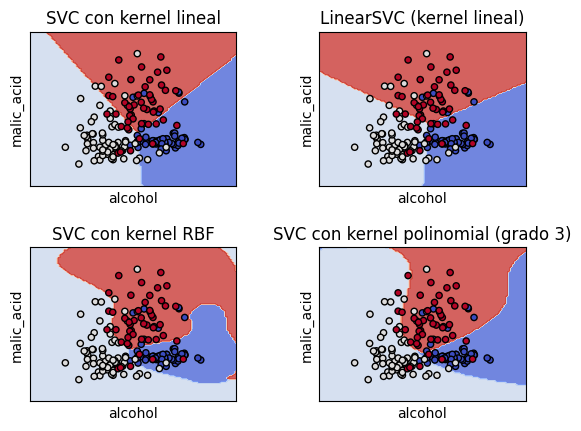

In [6]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

# Importar el conjunto de datos de vinos
wine = datasets.load_wine()

# Tomar las primeras dos características del conjunto de datos
X = wine.data[:, :2]
y = wine.target

# Crear instancias de los clasificadores SVM
C = 1.0  # Parámetro de regularización del SVM
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# Títulos para los gráficos
titles = (
    "SVC con kernel lineal",
    "LinearSVC (kernel lineal)",
    "SVC con kernel RBF",
    "SVC con kernel polinomial (grado 3)",
)

# Configurar una cuadrícula de 2x2 para los gráficos
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=wine.feature_names[0],
        ylabel=wine.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
